<a href="https://colab.research.google.com/github/sosullivan7221/datasci_6_anova/blob/main/week6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6

## Packages

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt



## Load Dataset

In [4]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

df = pd.DataFrame(X)


df1 = df[['gender', 'time_in_hospital', 'diabetesMed']]
df1

# Variables = time_in_hospital (DV), gender (IV), diabetesMed (IV)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,gender,time_in_hospital,diabetesMed
0,Female,1,No
1,Female,3,Yes
2,Female,2,Yes
3,Male,2,Yes
4,Male,1,Yes
...,...,...,...
101761,Male,3,Yes
101762,Female,5,Yes
101763,Male,1,Yes
101764,Female,10,Yes


## Analysis

### Normality

In [5]:
# For just time_in_hospital

print('Main DV: ', stats.shapiro(df1['time_in_hospital']))

## Data may not be normally distributed due to low P-Value, however may not be fully accurate due to large number of rows.

Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
# For all groups

combinations = [
    ('Male', 'Yes'),
    ('Male', 'No'),
    ('Female', 'Yes'),
    ('Female', 'No')
]

for gender, diabetesMed in combinations:
    subset = df[(df['gender'] == gender) & (df['diabetesMed'] == diabetesMed)]
    _, p_value = stats.shapiro(subset['time_in_hospital'])

    print(f"Group ({gender}, {diabetesMed}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

  ## Data may not be normally distributed due to low P-Value, however may not be fully accurate due to large number of rows.

Group (Male, Yes):
P-value from Shapiro-Wilk Test: 0.0

Group (Male, No):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, Yes):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, No):
P-value from Shapiro-Wilk Test: 0.0



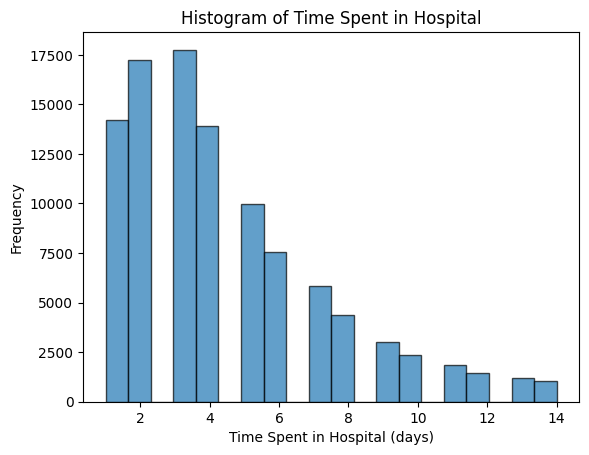

In [7]:
# Histogram

plt.hist(df1['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Time Spent in Hospital (days)')
plt.ylabel('Frequency')
plt.show()

### Homoscedasticity

In [12]:
# Levene's Test

statistic, p_value = stats.levene(
    df1['time_in_hospital'][df1['gender'] == 'Male'][df1['diabetesMed'] == 'Yes'],
    df1['time_in_hospital'][df1['gender'] == 'Male'][df1['diabetesMed'] == 'No'],
    df1['time_in_hospital'][df1['gender'] == 'Female'][df1['diabetesMed'] == 'Yes'],
    df1['time_in_hospital'][df1['gender'] == 'Female'][df1['diabetesMed'] == 'No']
)

print(f"Levenes Test Statistic: {statistic}, P-value: {p_value} \n")

## The P-Value is beneath .05, meaning that there is a significant differences between variances of each subset.

Levenes Test Statistic: 19.85258933862373, P-value: 7.368517167776519e-13 

